In [1]:
print("Student Name: Jatin Jain")
print("Student ID: 24145250")

Student Name: Jatin Jain
Student ID: 24145250


#Part 1. Implementing a Sentiment Analysis

1-1. Use your own data set, run a sentiment analysis and show the outputs.
You are free to choose any data set which contains texts which can be your input
features.

In [2]:
import pandas as pd

#source of the data: https://datahub.cusp.nyu.edu/ 
#Center for Urban Science and Progress Data Hub by NYU

#reading the file and putting it in dataframe
tweet = pd.read_csv('/content/drive/MyDrive/Applied NLP/tweet data.csv')

print(tweet.iloc[:10,:1])
print("Shape:", tweet.shape)
print("Column Names", tweet.columns.values)

   Emotion
0      joy
1     fear
2    anger
3  sadness
4  disgust
5    shame
6    guilt
7      joy
8     fear
9    anger
Shape: (7652, 2)
Column Names ['Emotion' 'Text']


In [3]:
#Pre-processing of data

category= tweet['Emotion']
label = list(set(category))
print ('possible categories', label)

counts = tweet['Emotion'].value_counts()
print(counts)

possible categories ['sadness', 'guilt', 'joy', 'fear', 'anger', 'disgust', 'shame']
anger      1094
sadness    1094
disgust    1094
shame      1094
fear       1093
joy        1092
guilt      1091
Name: Emotion, dtype: int64


In [4]:
#checkign first 5 rows of the dataframe

tweet.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


#Benchmark - Textblob

In [5]:
from textblob import TextBlob

In [6]:
import regex as re

def cleaning(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
tweet['Clean_text'] = tweet['Text'].apply(cleaning)

#movie.head()
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

In [7]:
tweet['Clean_text']=tweet['Clean_text'].str.lower()

print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

In [8]:
from nltk.tokenize import regexp_tokenize
from nltk import RegexpTokenizer

tokenizer_re=RegexpTokenizer("[\w]+")

tweet['Clean_text']=tweet['Clean_text'].map(tokenizer_re.tokenize)
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stop_words=stopwords.words('english')


tweet['Clean_text']=tweet['Clean_text'].apply(lambda words: [word for word in words if word not in nltk_stop_words and len(word)>2])
print (tweet.iloc[100:120,:])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When

In [10]:
tweet['Clean_text_to_string']=tweet['Clean_text'].apply(lambda x: (' '.join(x)))
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

In [11]:
# Lemmatization.-> This may takes some times.

import nltk
#Example of PoS taggings on tokenized sentence.
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def get_pos_tags(word):
    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
  text=[WordNetLemmatizer().lemmatize(w, get_pos_tags(w)) for w in text]   
  return text

tweet['Clean_text']=tweet['Clean_text'].apply(lemmatize_text)
print (tweet.iloc[100:120,:])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police..

In [12]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [13]:
tweet['polarity']=tweet['Clean_text_to_string'].apply(polarity)
tweet['subjectivity']=tweet['Clean_text_to_string'].apply(subjectivity)
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

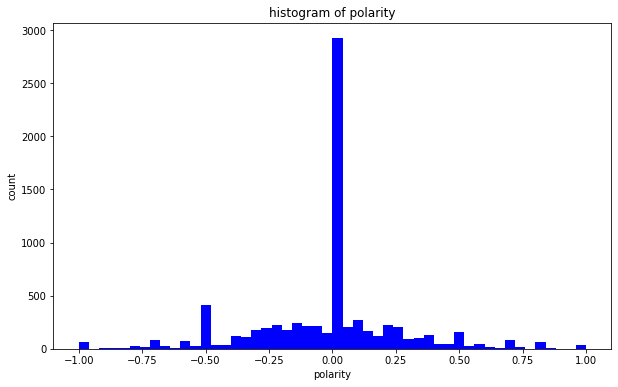

In [14]:
import matplotlib.pyplot as plt

#count the frequency of polarity.
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(tweet.polarity, num_bins, facecolor='blue')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of polarity')
plt.show()

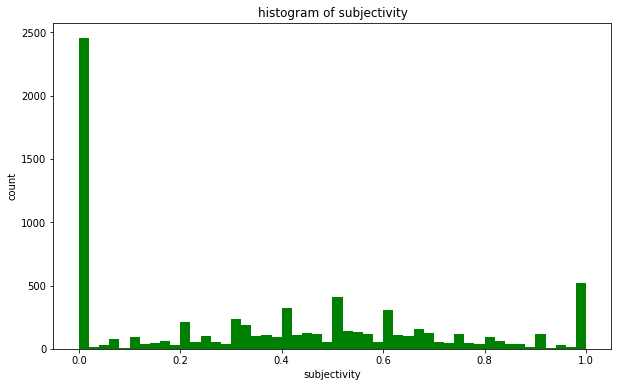

In [38]:
import matplotlib.pyplot as plt

#count the frequency of polarity.
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(tweet.subjectivity, num_bins, facecolor='green')
plt.xlabel('subjectivity')
plt.ylabel('count')
plt.title('histogram of subjectivity')
plt.show()

1-2. Choose one sentiment analysis algorithm as a benchmark and another one for your main
analysis.

#Main Analysis - Vader

In [16]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 125 kB 3.2 MB/s 


In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
def vader_score(text):
  return analyzer.polarity_scores(text)

In [19]:
tweet['vader_score']=tweet['Clean_text_to_string'].apply(vader_score)
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

In [20]:
tweet['vader_compound']=tweet['vader_score'].apply(lambda score_dict: score_dict['compound'])
tweet['vader_negative']=tweet['vader_score'].apply(lambda score_dict: score_dict['neg'])
tweet['vader_neutral']=tweet['vader_score'].apply(lambda score_dict: score_dict['neu'])
tweet['vader_positive']=tweet['vader_score'].apply(lambda score_dict: score_dict['pos'])
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

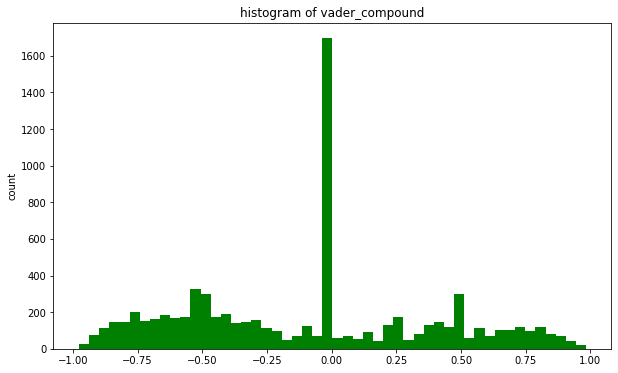

In [21]:
import matplotlib.pyplot as plt

#count the frequency of vader outputs.
num_bins=50
plt.figure(figsize=(10,6))
n, bins, patches=plt.hist(tweet.vader_compound    , num_bins, facecolor='green')
#plt.xlabel('polarity')
plt.ylabel('count')
plt.title('histogram of vader_compound')
plt.show()

In [22]:
print ("Shape:", tweet.shape)

#Column names?
print ("Column Names",tweet.columns.values)

#movie.head()
print (tweet.iloc[100:120,:])

Shape: (7652, 11)
Column Names ['Emotion' 'Text' 'Clean_text' 'Clean_text_to_string' 'polarity'
 'subjectivity' 'vader_score' 'vader_compound' 'vader_negative'
 'vader_neutral' 'vader_positive']
     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
1

In [23]:
tweet['vader_score_no_pre_processing']=tweet['Text'].apply(vader_score)
print (tweet.iloc[100:120,:])

tweet['vader_compound_no_pp']=tweet['vader_score_no_pre_processing'].apply(lambda score_dict: score_dict['compound'])
tweet['vader_negative_no_pp']=tweet['vader_score_no_pre_processing'].apply(lambda score_dict: score_dict['neg'])
tweet['vader_neutral_no_pp']=tweet['vader_score_no_pre_processing'].apply(lambda score_dict: score_dict['neu'])
tweet['vader_positive_no_pp']=tweet['vader_score_no_pre_processing'].apply(lambda score_dict: score_dict['pos'])
print (tweet.iloc[100:120,:])

     Emotion                                               Text  \
100    anger  When my boyfriend went away for a month long h...   
101  sadness  Last year when I worked during the Summer holi...   
102  disgust         When a dog is left whining outside a shop.   
103    shame  When I promised to help a friend over a weeken...   
104    guilt  When I realized that I had three more examinat...   
105      joy  The day I was told that I had been accepted as...   
106     fear  While taking a short cut through the Vasa park...   
107    anger  At a restaurant I observed how the gypsies tri...   
108  sadness  At the begining of a new course one is afraid ...   
109  disgust  While walking in town I noticed how the police...   
110    shame  When my boyfriend revealed that he knew that I...   
111    guilt  When I am dishonest to a friend to whom I am v...   
112      joy  When I found out that I had passed the last tw...   
113     fear  When my father was ill and was waiting for the..

1-3. State a reason why you have selected the sentiment analysis algorithm for your main
analysis.

Ans - Vader was selected for the main analysis because it is mainly designed for sentiments expressed in social media. Vader also seems to work on negative sentiments classification.

1-4. Compare the benchmark and the main analysis outputs. What differences do you see
from both outputs?

Ans - From the above we can see that Vader was much better in classifying the social media data in terms of positive, negative or compound. While Textblob is majorly for classifying the data with polarity. 

In cases without major polarity, textblob fails to accurately classify or  analyze the sentiments of the data. 

#Part 2. Implementing a (supervised) Sentiment Analysis using IMDB Data Set

2-1. Using IMDB data set, choose a binary classification algorithm and show the outputs
including performance metrics. 

In [24]:
import pandas as pd
movie = pd.read_csv('/content/drive/MyDrive/Applied NLP/IMDB Dataset.csv')
print(movie.iloc[:10,:1])
print("Shape:", movie.shape)
print("Column Names", movie.columns.values)

                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...
5  Probably my all-time favorite movie, a story o...
6  I sure would like to see a resurrection of a u...
7  This show was an amazing, fresh & innovative i...
8  Encouraged by the positive comments about this...
9  If you like original gut wrenching laughter yo...
Shape: (50000, 2)
Column Names ['review' 'sentiment']


In [25]:
categories = movie['sentiment']
labels = list(set(categories))
print ('possible categories', labels)

count = movie['sentiment'].value_counts()
print(count)

possible categories ['positive', 'negative']
positive    25000
negative    25000
Name: sentiment, dtype: int64


In [26]:
movie['label_num'] = movie.sentiment.map({'negative':0, 'positive':1})
print("Shape:", movie.shape)
print("Column Names:",movie.columns.values)
print(movie.iloc[:10,:1])

Shape: (50000, 3)
Column Names: ['review' 'sentiment' 'label_num']
                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...
5  Probably my all-time favorite movie, a story o...
6  I sure would like to see a resurrection of a u...
7  This show was an amazing, fresh & innovative i...
8  Encouraged by the positive comments about this...
9  If you like original gut wrenching laughter yo...


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(movie['review'], 
                                                    movie['label_num'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(movie.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (12500/50000)

Number of rows in the total set: 50000
Number of rows in the training set: 37500
Number of rows in the test set: 12500
0.25


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,                    
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (37500, 248)
Shape of testing set (12500, 248)


In [29]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'story': 199, 'looking': 120, 'way': 230, 'home': 93, 'old': 146, 'young': 247, 'american': 7, 'family': 66, 'got': 83, 'years': 245, 'later': 107, 'perfect': 150, 'man': 131, 'role': 174, 'does': 50, 'great': 84, 'work': 237, 'don': 53, 'actor': 4, 'second': 183, 'actors': 5, 'plays': 159, 'hope': 94, 'quite': 166, 'watch': 227, 'trying': 215, 'scene': 178, 'funny': 75, 'big': 17, 'looks': 121, 'fun': 74, 'use': 218, 'films': 71, 'play': 156, 'best': 15, 'interesting': 100, 'horror': 95, 'making': 130, 'doesn': 51, 'acting': 2, 'entertaining': 60, 'nice': 143, 'comedy': 35, 'high': 91, '10': 0, 'year': 244, 'guy': 85, 'night': 144, 'rest': 172, 'set': 188, 'say': 177, 'movies': 139, 'll': 117, 'love': 124, 'music': 140, 'audience': 8, 'watched': 228, 'right': 173, 'thought': 209, 'watching': 229, 'away': 9, 'think': 208, 'going': 82, 'wife': 232, 'getting': 77, 'pretty': 163, 'house': 96, 'know': 106, 'life': 111, 'help': 90, 'production': 165, 'written': 242, 'or

#Benchmark - Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.79544
Precision score:  0.7794612794612794
Recall score:  0.8202609115799646
F1 score:  0.7993408145648592


In [32]:
# Precision/Recall/F1-score measures for each element in the test data.
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      6291
           1       0.78      0.82      0.80      6209

    accuracy                           0.80     12500
   macro avg       0.80      0.80      0.80     12500
weighted avg       0.80      0.80      0.80     12500



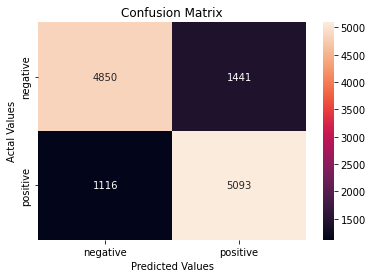

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True , fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

2-2. Assuming that your benchmark algorithm is NB classification, compare the benchmark
and the main analysis outputs. Can you generate the better performance using your own
classification algorithm? If so, what strategies/efforts did you take/make to increase the
performance?

#Main Analysis - Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(training_data, y_train)
lr_predicted = lr.predict(testing_data)

In [35]:
print('Accuracy score: ', format(accuracy_score(y_test, lr_predicted)))
print('Precision score: ', format(precision_score(y_test, lr_predicted)))
print('Recall score: ', format(recall_score(y_test, lr_predicted)))
print('F1 score: ', format(f1_score(y_test, lr_predicted)))

Accuracy score:  0.80696
Precision score:  0.7945375543140907
Recall score:  0.8246094379127074
F1 score:  0.809294238520509


In [36]:
print(classification_report(y_test, lr_predicted))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      6291
           1       0.79      0.82      0.81      6209

    accuracy                           0.81     12500
   macro avg       0.81      0.81      0.81     12500
weighted avg       0.81      0.81      0.81     12500



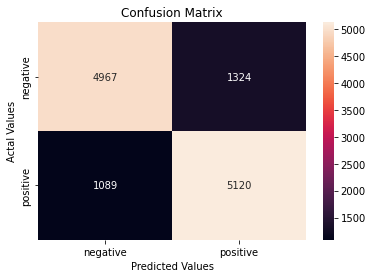

In [37]:
cm_lr = confusion_matrix(y_test, lr_predicted)
cm_df_lr = pd.DataFrame(cm_lr,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df_lr, annot=True , fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Ans - As we can see Logistic Regression has better accuracy and F1 Score then Naive Bayes, so LR is a better algorithm then NB. 

Different strategies that can be considered to increase the performance can be such as parameter tuning, hyper parameter optimization and customization . 